In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2 as cv
import torch

In [20]:
model = YOLO('yolov8n-seg.pt')

## testing on pre trained seg model


0: 640x384 1 person, 1 book, 67.4ms
Speed: 2.0ms preprocess, 67.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)


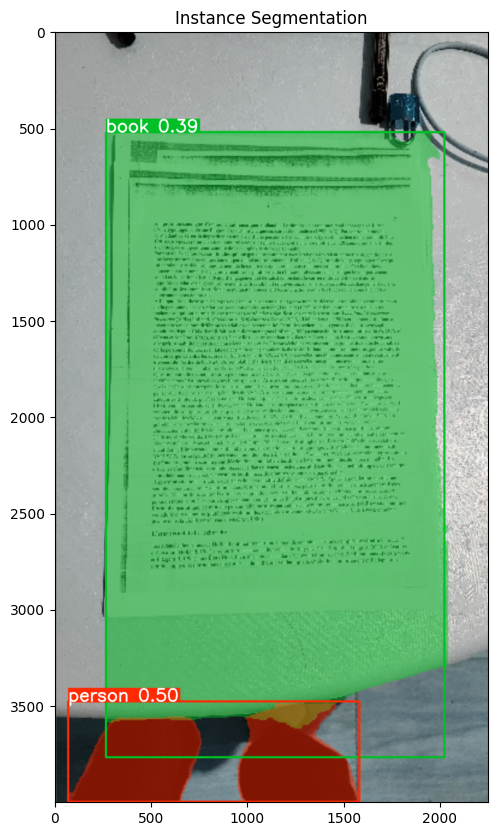

In [7]:
img = cv.imread("data/3.jpg")

instance_results = model.predict(img)
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(15, 10))
plt.title("Instance Segmentation")
plt.imshow(instance_result_array)

In [8]:
result = instance_results[0]
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

Object type: 0.0
Coordinates: [68.78910064697266, 3477.3017578125, 1579.5460205078125, 3998.23681640625]
Probability: 0.4989466369152069
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 

## training

In [ ]:
# model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

train_res = model.train(
    data="dataset.yaml",  
    epochs=10,  
    imgsz=640,  
    device="cpu", 
)

val = model.val()

In [65]:
results = model("data/4.jpg")
results[0].show()


image 1/1 f:\dev stuff\yolo\data\4.jpg: 640x384 1 knife, 1 book, 68.8ms
Speed: 2.0ms preprocess, 68.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)


In [61]:
# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model

Ultralytics 8.3.54  Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i5-9400F 2.90GHz)

PyTorch: starting from 'runs\segment\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (6.4 MB)

ONNX: starting export with onnx 1.16.1 opset 19...
ONNX: slimming with onnxslim 0.1.45...
ONNX: export success  4.4s, saved as 'runs\segment\train3\weights\best.onnx' (12.7 MB)

Export complete (4.7s)
Results saved to F:\dev stuff\yolo\runs\segment\train3\weights
Predict:         yolo predict task=segment model=runs\segment\train3\weights\best.onnx imgsz=640  
Validate:        yolo val task=segment model=runs\segment\train3\weights\best.onnx imgsz=640 data=dataset.yaml  
Visualize:       https://netron.app


In [73]:
model2=YOLO('model/last.pt')


0: 640x384 (no detections), 66.8ms
Speed: 2.0ms preprocess, 66.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)


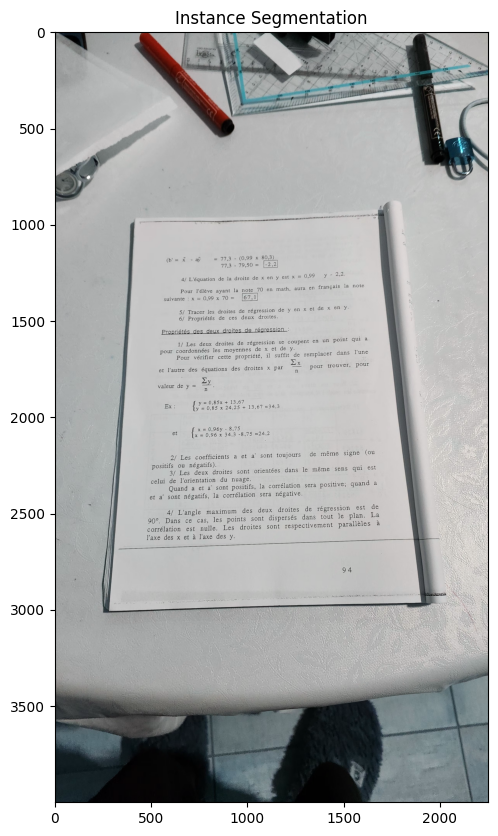

In [74]:
img = cv.imread("data/4.jpg")

instance_results = model2.predict(img)
instance_result_array = instance_results[0].plot()
fig = plt.figure(figsize=(15, 10))
plt.title("Instance Segmentation")
plt.imshow(instance_result_array)

In [78]:
instance_results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'paper'}
 obb: None
 orig_img: array([[[120, 127, 130],
         [119, 124, 127],
         [138, 142, 143],
         ...,
         [171, 172, 168],
         [171, 172, 168],
         [170, 171, 167]],
 
        [[141, 148, 151],
         [139, 144, 147],
         [149, 153, 154],
         ...,
         [176, 177, 173],
         [173, 174, 170],
         [167, 168, 164]],
 
        [[152, 159, 162],
         [146, 151, 154],
         [146, 150, 151],
         ...,
         [177, 178, 174],
         [175, 176, 172],
         [168, 169, 165]],
 
        ...,
 
        [[ 33,  44,  48],
         [ 32,  43,  47],
         [ 23,  35,  39],
         ...,
         [110, 128, 135],
         [111, 129, 136],
         [124, 142, 149]],
 
        [[ 31,  42,  46],
         [ 30,  41,  45],
         [ 23,  35,  39],
         ...,
         [107, 125,

In [75]:
result = instance_results[0]
box = result.boxes[0]
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)
print(result.names)

IndexError: index 0 is out of bounds for dimension 0 with size 0